# NBA Stats and Salaries Analysis

Can we tell which players make above league average just by looking at their stats? Of course looking at the stats of players like LeBron James, Steph Curry and James Harden we can clearly see that their stats dictate that they make above league average. However, what about players like Trae Young, Zion Williamson or Mikal Bridges? The goal of my project is to analyze the statistics of the 2020-2021 season and construct a machine learning model that can predict whether players made above or below the league average of $7,689,656. There are several factors that go into this injuries, draft pick contracts, how they're used in their offense but I will do the best I can. 

In [153]:
import sys
import os
os.chdir('C:\\Users\\wally')
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score, log_loss,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
os.chdir('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts')

In [154]:
ss = pd.read_csv('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\basketball\\NBA Stats and Salaries.csv')
ss = ss.rename(columns = {'salary_above_average': 'salary'})

In [155]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rk                439 non-null    int64  
 1   player_name       439 non-null    object 
 2   Pos               439 non-null    object 
 3   Age               439 non-null    int64  
 4   Tm                439 non-null    object 
 5   G                 439 non-null    int64  
 6   GS                439 non-null    int64  
 7   MP                439 non-null    int64  
 8   FG                439 non-null    int64  
 9   FGA               439 non-null    int64  
 10  FG%               439 non-null    float64
 11  3P                439 non-null    int64  
 12  3PA               439 non-null    int64  
 13  3P%               439 non-null    float64
 14  2P                439 non-null    int64  
 15  2PA               439 non-null    int64  
 16  2P%               439 non-null    float64
 1

Variable Description:
RK = Alphabetical Rank Among Players
player_name = Player Name
Pos = Player Position
Age = Age
Tm = Team
G = Games Played
GS = Games Started
MP = Minutes Played
FG = Field Goals Made
FGA = Field Goals Attempted
FG% = Field Goal Percentage
3P = 3 Pointers Made
3PA = 3 Pointers Attempted
3P% = 3 Point Percentage
2P = 2 Pointers Made
2PA = 2 Pointers Attempted
2P% = 2 Point Percentage
eFG% = Effective Field Goal Percentage (Adjusts for 3 points being 1 more point than two pointers)
FT = Free Throws Made
FTA = Free Throws Attempted
FT% = Free Throw Percentage
ORB = Offensive Rebounds
DRB = Defensive Rebounds
TRB = Total Rebounds
AST = Assists
STL = Steals
BLK = Blocks
TOV = Turnovers
PF = Personal Fouls
PTS = Points
salary_rank = Rank based on salary for 2020-21 season
salary_20-21 = Salary for 2020-21 season
salary_21-22 = Salary for 2021-22 season
signed_using = Type of contract
guaranteed_money = Guaranteed money for length of contract
salary = Indicates whether the player earns more than $7689656 USD for the 2020-21 season. 1 = Above Average, 0 = Below Average

In [156]:
ss_top_ten = ss.loc[[94, 417, 321, 412, 160, 202, 111, 138, 85, 67]]
ss_top_ten

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,signed_using,guaranteed_money,salary
94,110,Stephen Curry,PG,32,GSW,42,42,1419,407,855,0.476,196,483,0.406,211,372,0.567,0.591,225,243,0.926,22,207,229,254,56,4,132,74,1235,1,43006362,45780966,Bird Rights,88787328.0,1
417,488,Russell Westbrook,PG,32,WAS,42,42,1479,347,804,0.432,56,181,0.309,291,623,0.467,0.466,165,269,0.613,68,371,439,442,53,17,210,118,915,2,41358814,44211146,Bird Rights,85569960.0,1
321,373,Chris Paul,PG,35,PHO,48,48,1525,291,591,0.492,64,173,0.370,227,418,0.543,0.547,123,133,0.925,19,205,224,421,70,11,110,117,769,3,41358814,44211146,Bird Rights,41358814.0,1
412,480,John Wall,PG,30,HOU,32,32,1018,229,573,0.400,62,195,0.318,167,378,0.442,0.454,126,169,0.746,15,93,108,217,33,25,108,39,646,4,41254920,44310840,Bird Rights,85565760.0,1
160,187,James Harden,PG-SG,31,TOT,42,42,1558,334,722,0.463,117,327,0.358,217,395,0.549,0.544,275,316,0.870,35,301,336,457,50,29,173,95,1060,5,40824000,43848000,Bird Rights,84672000.0,1
202,235,LeBron James,PG,36,LAL,41,41,1388,388,756,0.513,98,266,0.368,290,490,0.592,0.578,168,239,0.703,24,299,323,323,43,24,152,65,1042,6,39219565,41180544,Cap Space,124875097.0,1
111,131,Kevin Durant,PF,32,BRK,19,18,679,188,359,0.524,49,113,0.434,139,246,0.565,0.592,126,145,0.869,7,132,139,100,14,27,67,43,551,7,39058950,40918900,Sign and Trade,79977850.0,1
138,162,Paul George,SF,30,LAC,38,38,1268,298,636,0.469,119,281,0.423,179,355,0.504,0.562,127,144,0.882,33,207,240,205,43,17,121,88,842,8,35450412,39344970,Maximum Salary,162928115.0,1
85,100,Mike Conley,PG,33,UTA,40,40,1188,230,502,0.458,112,266,0.421,118,236,0.500,0.570,92,108,0.852,31,108,139,221,55,6,77,75,664,10,34504132,0,Cap Space,34504132.0,1
67,79,Jimmy Butler,SF,31,MIA,35,35,1178,246,507,0.485,14,68,0.206,232,439,0.528,0.499,236,277,0.852,71,192,263,256,69,13,76,51,742,11,34379100,36016200,Sign and Trade,70395300.0,1


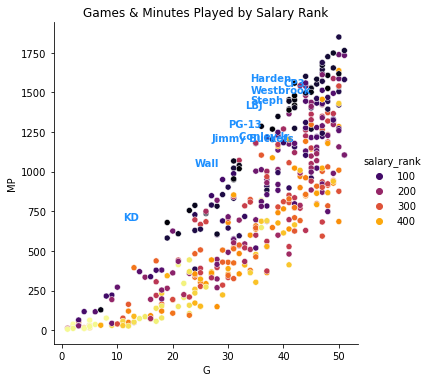

In [157]:
sns.relplot(x = 'G', y = 'MP', hue = 'salary_rank', data = ss, palette = 'inferno')
plt.title('Games & Minutes Played by Salary Rank')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George','Mike Conley','Jimmy Butler']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13','Conley Jr.','Jimmy Buckets']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss.G[ss.player_name == i]-8.0, ss['MP'][ss.player_name == i]+15.0, j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

Text(85    40.5
Name: G, dtype: float64, 85    1188
Name: MP, dtype: int64, 'Conley Jr.')

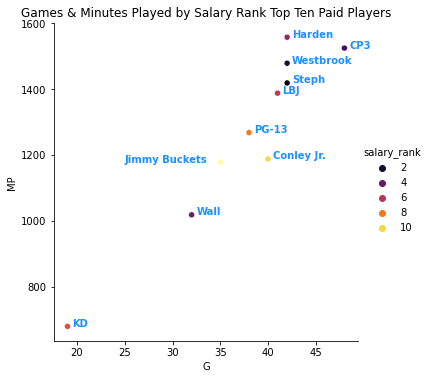

In [158]:
sns.relplot(x = 'G', y = 'MP', hue = 'salary_rank', data = ss_top_ten, palette = 'inferno')
plt.title('Games & Minutes Played by Salary Rank Top Ten Paid Players')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss_top_ten.G[ss_top_ten.player_name == i]+0.5, ss_top_ten['MP'][ss_top_ten.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten.G[ss_top_ten.player_name == 'Jimmy Butler']-10.0, ss_top_ten['MP'][ss_top_ten.player_name == 'Jimmy Butler'], 'Jimmy Buckets', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed') 
plt.text(ss_top_ten.G[ss_top_ten.player_name == 'Mike Conley']+0.5, ss_top_ten['MP'][ss_top_ten.player_name == 'Mike Conley'], 'Conley Jr.', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

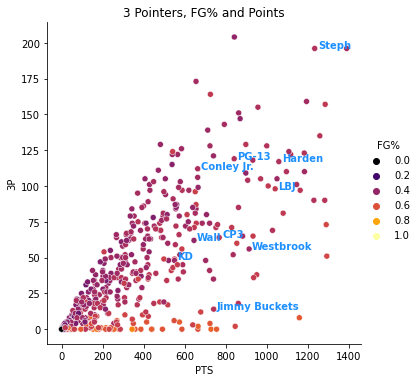

In [159]:
sns.relplot(x = 'PTS', y = '3P', hue = 'FG%', data = ss, palette = 'inferno')
plt.title('3 Pointers, FG% and Points')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George','Mike Conley','Jimmy Butler']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13','Conley Jr.','Jimmy Buckets']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss.PTS[ss.player_name == i]+15.0, ss['3P'][ss.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold')

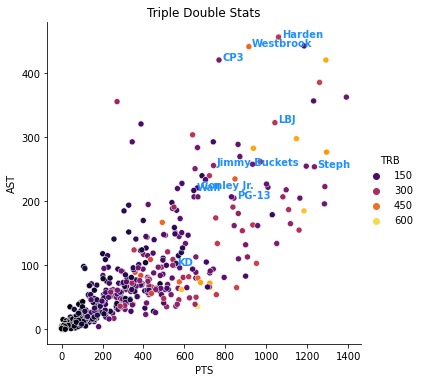

In [160]:
sns.relplot(x = 'PTS', y = 'AST', hue = 'TRB', data = ss, palette = 'inferno')
plt.title('Triple Double Stats')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George','Mike Conley','Jimmy Butler']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13','Conley Jr.','Jimmy Buckets']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss.PTS[ss.player_name == i]+15.0, ss['AST'][ss.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

Text(94    1155.0
Name: PTS, dtype: float64, 94    254
Name: AST, dtype: int64, 'Curry')

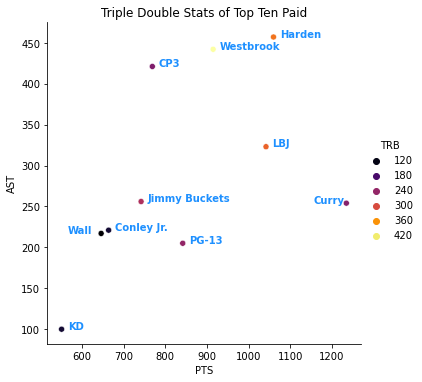

In [161]:
sns.relplot(x = 'PTS', y = 'AST', hue = 'TRB', data = ss_top_ten, palette = 'inferno')
plt.title('Triple Double Stats of Top Ten Paid')
top_ten = ['Russell Westbrook','Chris Paul','James Harden','LeBron James','Kevin Durant','Paul George']
t10_nick = ['Westbrook','CP3','Harden','LBJ','KD','PG-13']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss_top_ten.PTS[ss_top_ten.player_name == i]+15.0, ss_top_ten['AST'][ss_top_ten.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten.PTS[ss_top_ten.player_name == 'Jimmy Butler']+15.0, ss_top_ten['AST'][ss_top_ten.player_name == 'Jimmy Butler'], 'Jimmy Buckets', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed') 
plt.text(ss_top_ten.PTS[ss_top_ten.player_name == 'Mike Conley']+15.0, ss_top_ten['AST'][ss_top_ten.player_name == 'Mike Conley'], 'Conley Jr.', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten.PTS[ss_top_ten.player_name == 'John Wall']-80.0, ss_top_ten['AST'][ss_top_ten.player_name == 'John Wall'], 'Wall', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten.PTS[ss_top_ten.player_name == 'Stephen Curry']-80.0, ss_top_ten['AST'][ss_top_ten.player_name == 'Stephen Curry'], 'Curry', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

Text(85    0.58
Name: eFG%, dtype: float64, 85    0.852
Name: FT%, dtype: float64, 'Conley Jr.')

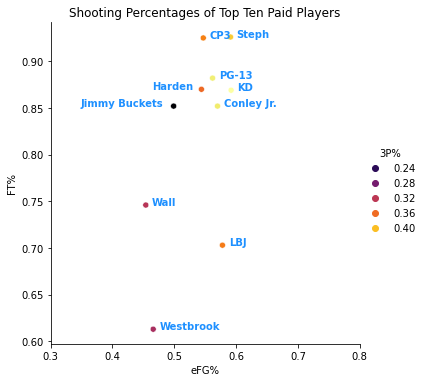

In [162]:
sns.relplot(x = 'eFG%', y = 'FT%', hue = '3P%', data = ss_top_ten, palette = 'inferno')
plt.title('Shooting Percentages of Top Ten Paid Players')
plt.xlim(0.3,0.8)
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','LeBron James','Kevin Durant','Paul George']
t10_nick = ['Steph','Westbrook','CP3','Wall','LBJ','KD','PG-13']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss_top_ten['eFG%'][ss_top_ten.player_name == i]+0.01, ss_top_ten['FT%'][ss_top_ten.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten['eFG%'][ss_top_ten.player_name == 'Jimmy Butler']-0.15, ss_top_ten['FT%'][ss_top_ten.player_name == 'Jimmy Butler'], 'Jimmy Buckets', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed') 
plt.text(ss_top_ten['eFG%'][ss_top_ten.player_name == 'James Harden']-0.08, ss_top_ten['FT%'][ss_top_ten.player_name == 'James Harden'], 'Harden', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')
plt.text(ss_top_ten['eFG%'][ss_top_ten.player_name == 'Mike Conley']+0.01, ss_top_ten['FT%'][ss_top_ten.player_name == 'Mike Conley'], 'Conley Jr.', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed')

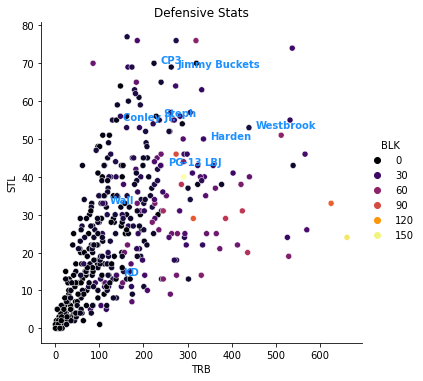

In [163]:
sns.relplot(x = 'TRB', y = 'STL', hue = 'BLK', data = ss, palette = 'inferno')
plt.title('Defensive Stats')
top_ten = ['Stephen Curry','Russell Westbrook','Chris Paul','John Wall','James Harden','LeBron James','Kevin Durant','Paul George','Mike Conley','Jimmy Butler']
t10_nick = ['Steph','Westbrook','CP3','Wall','Harden','LBJ','KD','PG-13','Conley Jr.','Jimmy Buckets']
for i,j in zip(top_ten, t10_nick):
    plt.text(ss.TRB[ss.player_name == i]+15.0, ss['STL'][ss.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold')

<ipython-input-164-6b3907c89b39>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['',0,10,20,30,40])


[Text(-10000000.0, 0, ''),
 Text(0.0, 0, '0'),
 Text(10000000.0, 0, '10'),
 Text(20000000.0, 0, '20'),
 Text(30000000.0, 0, '30'),
 Text(40000000.0, 0, '40'),
 Text(50000000.0, 0, '')]

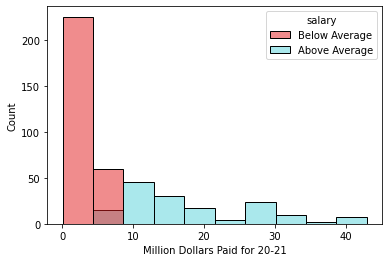

In [164]:
hls = sns.color_palette("hls")
pair = sns.color_palette('Paired')
xticks = np.linspace(0,10,5)
hlsg = [hls[3], pair[5]]
hlsg_r = [pair[5], hls[3]]
legend_map = {0: 'Below Average', 1: 'Above Average'}
ax = sns.histplot(x = 'salary_20-21', hue = ss['salary'].map(legend_map), data = ss, bins = 10, palette = hlsg_r)
plt.xlabel('Million Dollars Paid for 20-21')
ax.xaxis.set_ticklabels(['',0,10,20,30,40])

[Text(0, 0, 'Below Average'), Text(1, 0, 'Above Average')]

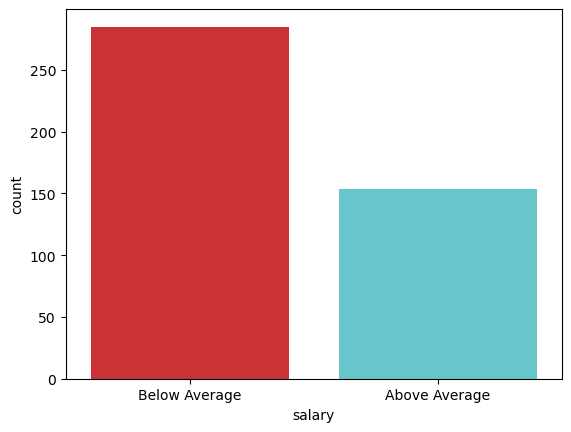

In [165]:
plt.style.use('default')
cp = sns.countplot(x = 'salary', data = ss, palette = hlsg_r)
cp.set(xlabel = 'salary')
cp.xaxis.set_ticklabels(['Below Average', 'Above Average'])


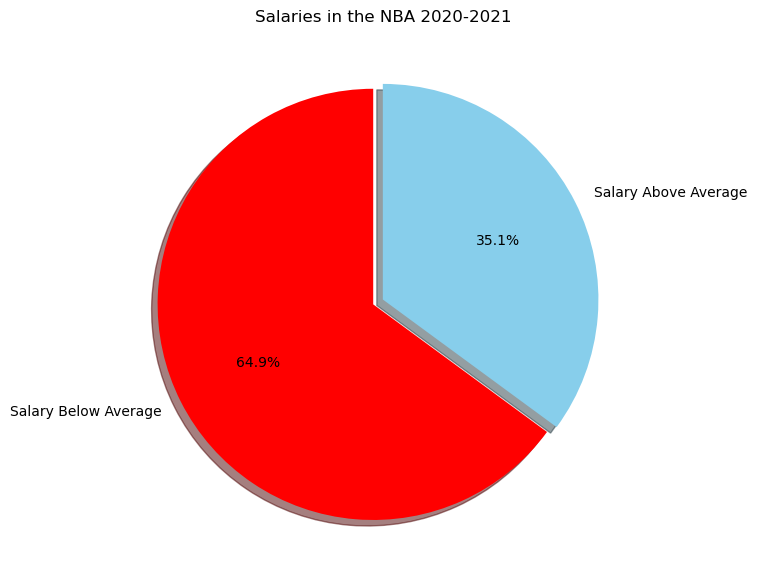

In [166]:
labels = ['Salary Below Average', 'Salary Above Average']
sizes = ss['salary'].value_counts(sort = True)

colors = ['red','skyblue']
explode = (0.05, 0)

pie = plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode ,labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle= 90)

pie.set_facecolor('white')
plt.title('Salaries in the NBA 2020-2021')
plt.show()

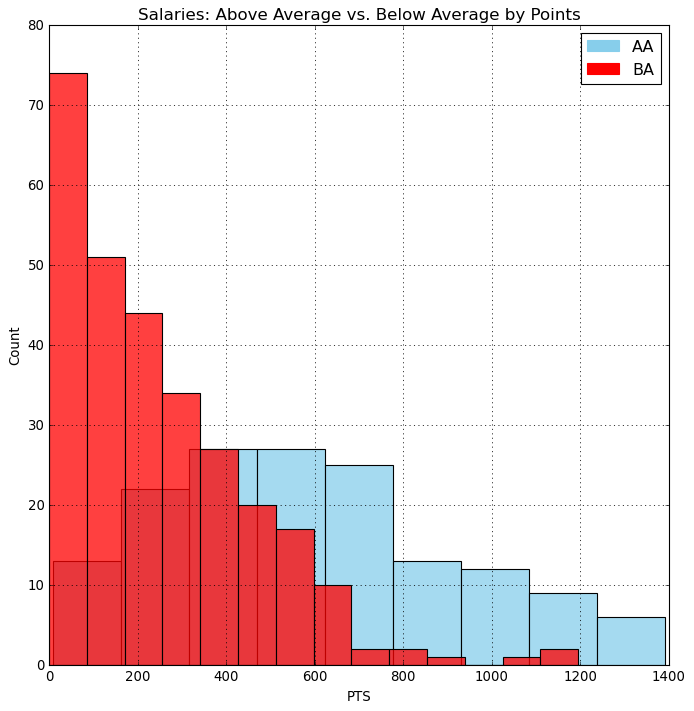

In [167]:
plt.style.use("classic")
bar1 = plt.figure(figsize = (10,10))

sns.histplot(ss[ss['salary'] == 1]['PTS'], color = 'skyblue')
sns.histplot(ss[ss['salary'] == 0]['PTS'], color = 'red')

plt.title('Salaries: Above Average vs. Below Average by Points', fontsize = 15)
plt.xlim()
plt.grid(linewidth = 0.7)
red_patch = mpatches.Patch(color='red', label='BA')
blue_patch = mpatches.Patch(color='skyblue', label='AA')
dat_legend = plt.legend(handles=[blue_patch, red_patch])
bar1.set_facecolor('white')
plt.show()

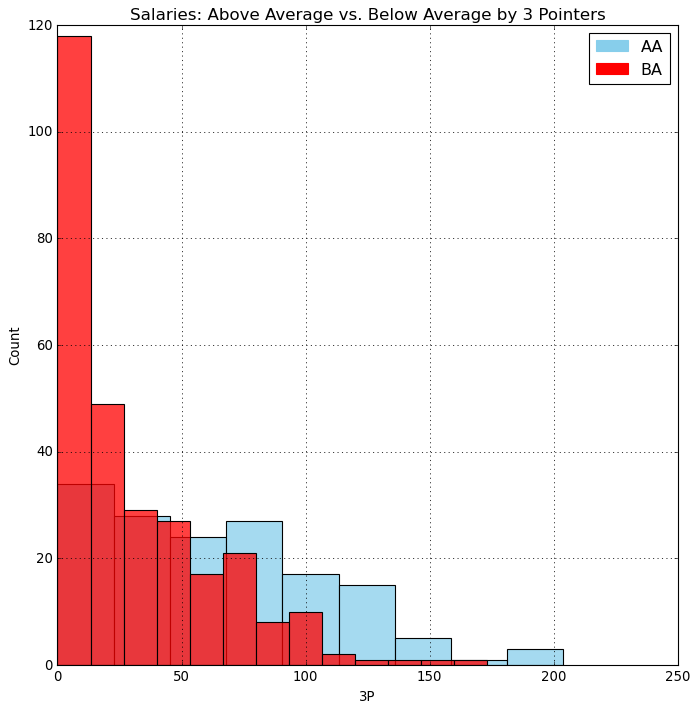

In [168]:
plt.style.use("classic")
bar1 = plt.figure(figsize = (10,10))

sns.histplot(ss[ss['salary'] == 1]['3P'], color = 'skyblue')
sns.histplot(ss[ss['salary'] == 0]['3P'], color = 'red')

plt.title('Salaries: Above Average vs. Below Average by 3 Pointers', fontsize = 15)
plt.xlim()
plt.grid(linewidth = 0.7)
red_patch = mpatches.Patch(color='red', label='BA')
blue_patch = mpatches.Patch(color='skyblue', label='AA')
dat_legend = plt.legend(handles=[blue_patch, red_patch])
bar1.set_facecolor('white')
plt.show()

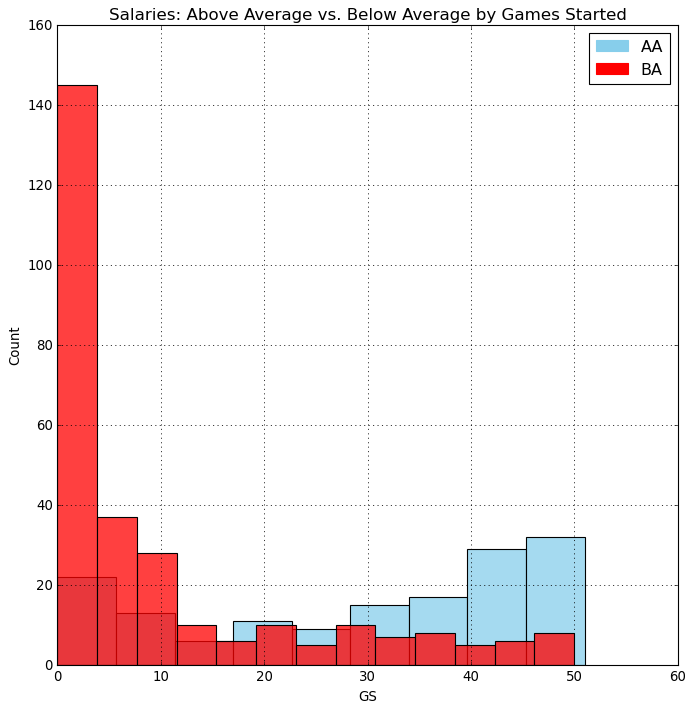

In [169]:
plt.style.use("classic")
bar1 = plt.figure(figsize = (10,10))

sns.histplot(ss[ss['salary'] == 1]['GS'], color = 'skyblue')
sns.histplot(ss[ss['salary'] == 0]['GS'], color = 'red')

plt.title('Salaries: Above Average vs. Below Average by Games Started', fontsize = 15)
plt.xlim()
plt.grid(linewidth = 0.7)
red_patch = mpatches.Patch(color='red', label='BA')
blue_patch = mpatches.Patch(color='skyblue', label='AA')
dat_legend = plt.legend(handles=[blue_patch, red_patch])
bar1.set_facecolor('white')
plt.show()

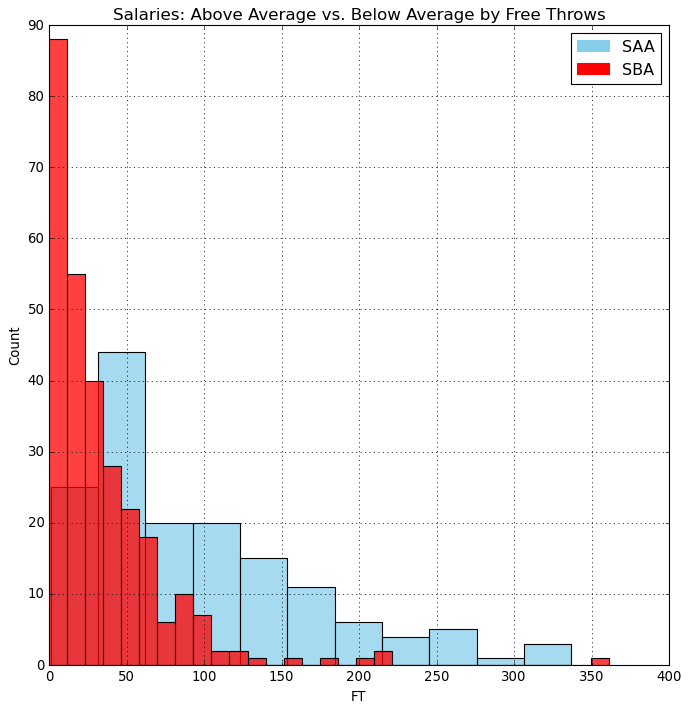

In [170]:
plt.style.use("classic")
bar1 = plt.figure(figsize = (10,10))

sns.histplot(ss[ss['salary'] == 1]['FT'], color = 'skyblue')
sns.histplot(ss[ss['salary'] == 0]['FT'], color = 'red')

plt.title('Salaries: Above Average vs. Below Average by Free Throws', fontsize = 15)
plt.xlim()
plt.grid(linewidth = 0.7)
red_patch = mpatches.Patch(color='red', label='SBA')
blue_patch = mpatches.Patch(color='skyblue', label='SAA')
dat_legend = plt.legend(handles=[blue_patch, red_patch])
bar1.set_facecolor('white')
plt.show()

In [171]:
pd.set_option('display.max_columns', None)
ss.sort_values(by = 'FT', ascending = False).head(20)

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,signed_using,guaranteed_money,salary
436,509,Trae Young,PG,22,ATL,47,47,1611,357,828,0.431,110,307,0.358,247,521,0.474,0.498,361,414,0.872,32,152,184,443,41,11,205,93,1185,174,6571800,8326471,1st Round Pick,14898271.0,0
240,278,Damian Lillard,PG,30,POR,47,47,1687,429,958,0.448,196,513,0.382,233,445,0.524,0.550,337,360,0.936,24,176,200,363,45,12,150,74,1391,19,31626953,43750000,1st Round Pick,227626953.0,1
117,137,Joel Embiid,C,26,PHI,32,32,1039,299,572,0.523,38,94,0.404,261,478,0.546,0.556,316,371,0.852,71,292,363,103,37,46,103,80,952,22,29542010,31579390,1st Round Pick,94738170.0,1
9,12,Giannis Antetokounmpo,PF,26,MIL,45,45,1529,468,829,0.565,51,169,0.302,417,660,0.632,0.595,307,447,0.687,80,432,512,277,51,60,169,129,1294,38,27528090,39344970,1st Round Pick,203793556.0,1
33,38,Bradley Beal,SG,27,WAS,41,41,1454,449,926,0.485,90,266,0.338,359,660,0.544,0.533,296,328,0.902,46,160,206,196,49,15,137,102,1284,31,28751775,34502130,Cap Space,63253905.0,1
160,187,James Harden,PG-SG,31,TOT,42,42,1558,334,722,0.463,117,327,0.358,217,395,0.549,0.544,275,316,0.870,35,301,336,457,50,29,173,95,1060,5,40824000,43848000,Bird Rights,84672000.0,1
427,499,Zion Williamson,PF,20,NOP,44,44,1444,444,712,0.624,8,23,0.348,436,689,0.633,0.629,264,373,0.708,115,196,311,155,41,30,113,101,1160,117,10245480,10733400,1st Round Pick,10245480.0,1
148,172,Jerami Grant,SF,26,DET,47,47,1621,346,814,0.425,105,296,0.355,241,518,0.465,0.490,254,296,0.858,32,194,226,134,33,52,92,110,1051,55,19047619,20000000,Sign and Trade,60000000.0,1
99,116,DeMar DeRozan,PF,31,SAS,41,41,1395,296,600,0.493,18,62,0.290,278,538,0.517,0.508,252,286,0.881,27,153,180,289,38,11,76,80,862,37,27739975,0,Cap Space,27739975.0,1
129,152,De'Aaron Fox,PG,23,SAC,50,50,1738,446,934,0.478,90,276,0.326,356,658,0.541,0.526,249,348,0.716,27,138,165,357,69,25,154,147,1231,147,8099627,28103550,1st Round Pick,171100217.0,1


In [172]:
pd.set_option('display.max_rows', None)
above_1000pts = ss.loc[ss['PTS']>=1000]
display(above_1000pts.sort_values(by = 'PTS', ascending = False))

,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,signed_using,guaranteed_money,salary
240,278,Damian Lillard,PG,30,POR,47,47,1687,429,958,0.448,196,513,0.382,233,445,0.524,0.550,337,360,0.936,24,176,200,363,45,12,150,74,1391,19,31626953,43750000,1st Round Pick,227626953.0,1
9,12,Giannis Antetokounmpo,PF,26,MIL,45,45,1529,468,829,0.565,51,169,0.302,417,660,0.632,0.595,307,447,0.687,80,432,512,277,51,60,169,129,1294,38,27528090,39344970,1st Round Pick,203793556.0,1
211,245,Nikola Jokić,C,25,DEN,49,49,1748,508,898,0.566,73,171,0.427,435,727,0.598,0.606,202,234,0.863,140,397,537,421,74,31,151,133,1291,34,28542009,30510423,Bird Rights,91531269.0,1
231,268,Zach LaVine,SG,25,CHI,47,47,1644,460,901,0.511,157,373,0.421,303,528,0.574,0.598,209,245,0.853,29,203,232,223,39,20,173,113,1286,53,19500000,19500000,Cap space,39000000.0,1
33,38,Bradley Beal,SG,27,WAS,41,41,1454,449,926,0.485,90,266,0.338,359,660,0.544,0.533,296,328,0.902,46,160,206,196,49,15,137,102,1284,31,28751775,34502130,Cap Space,63253905.0,1
104,122,Luka Dončić,PG,21,DAL,44,44,1539,448,922,0.486,135,359,0.376,313,563,0.556,0.559,229,312,0.734,34,324,358,386,43,26,190,95,1260,148,8049360,10174391,1st Round Pick,18223751.0,1
94,110,Stephen Curry,PG,32,GSW,42,42,1419,407,855,0.476,196,483,0.406,211,372,0.567,0.591,225,243,0.926,22,207,229,254,56,4,132,74,1235,1,43006362,45780966,Bird Rights,88787328.0,1
129,152,De'Aaron Fox,PG,23,SAC,50,50,1738,446,934,0.478,90,276,0.326,356,658,0.541,0.526,249,348,0.716,27,138,165,357,69,25,154,147,1231,147,8099627,28103550,1st Round Pick,171100217.0,1
278,327,Donovan Mitchell,SG,24,UTA,47,47,1570,408,937,0.435,159,402,0.396,249,535,0.465,0.520,220,261,0.843,46,162,208,255,48,13,133,102,1195,199,5195501,28103550,1st Round Pick,131099405.0,0
436,509,Trae Young,PG,22,ATL,47,47,1611,357,828,0.431,110,307,0.358,247,521,0.474,0.498,361,414,0.872,32,152,184,443,41,11,205,93,1185,174,6571800,8326471,1st Round Pick,14898271.0,0


Text(0.5, 1.0, 'Distribution of Players by Points')

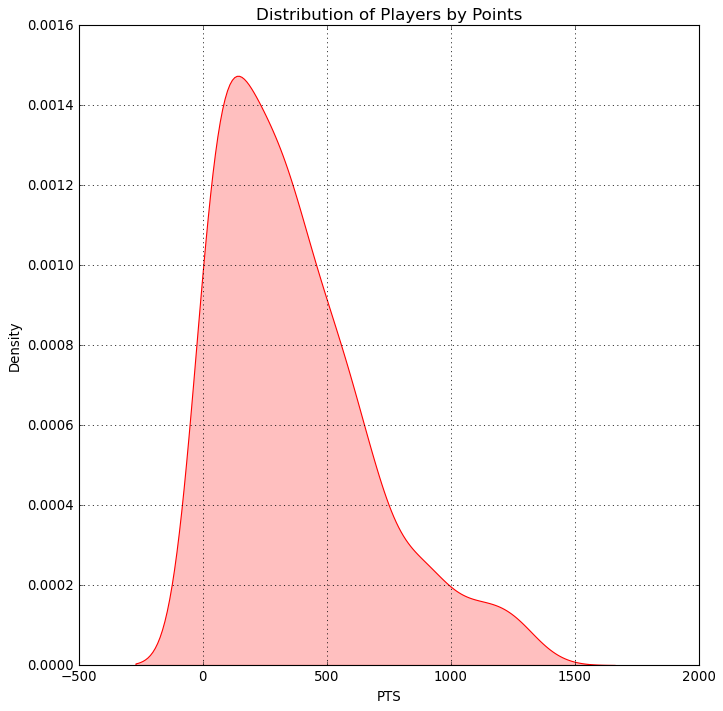

In [173]:
ax = plt.figure(figsize = (10,10))
sns.kdeplot(x = 'PTS', data = ss, shade = True, color = 'red')
plt.grid(linewidth = 0.7)
ax.set_facecolor('white')
plt.title('Distribution of Players by Points', fontsize = 15)

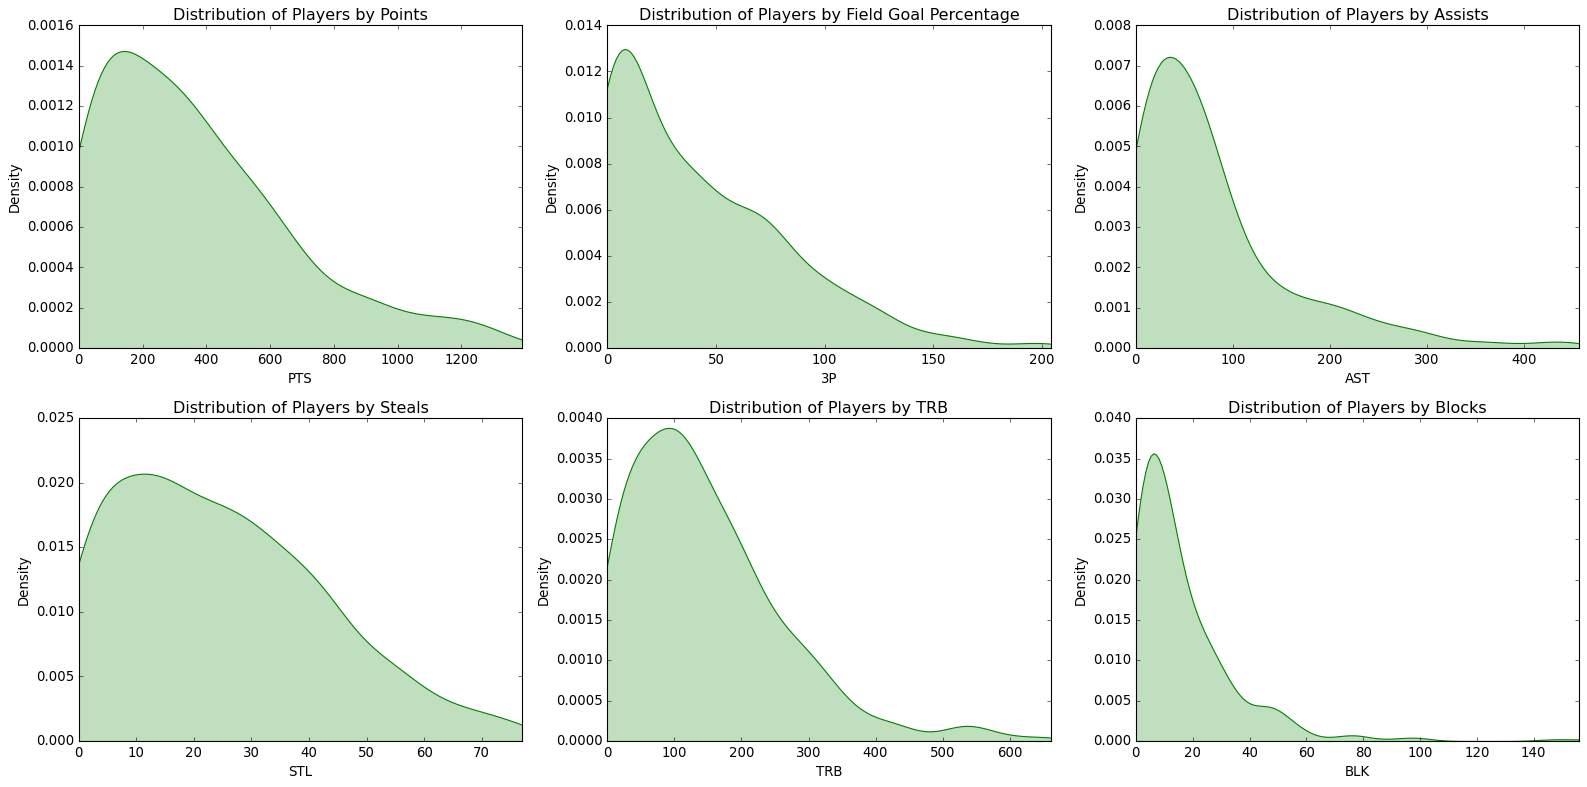

In [174]:
fig, axx = plt.subplots(2,3, figsize = (20,10))

axx[0,0].set_title('Distribution of Players by Points')
sns.kdeplot(x = 'PTS', data = ss, ax = axx[0,0], shade = True, color = 'green')
max_pts = ss['PTS'].max()
axx[0,0].set(xlim = (0,max_pts))

axx[0,1].set_title('Distribution of Players by Field Goal Percentage')
sns.kdeplot(x = '3P', data = ss, ax = axx[0,1], shade = True, color = 'green')
max_3P = ss['3P'].max()
axx[0,1].set(xlim = (0,max_3P))

axx[0,2].set_title('Distribution of Players by Assists')
sns.kdeplot(x = 'AST', data = ss, ax = axx[0,2], shade = True, color = 'green')
max_AST = ss['AST'].max()
axx[0,2].set(xlim = (0,max_AST))

axx[1,0].set_title('Distribution of Players by Steals')
sns.kdeplot(x = 'STL', data = ss, ax = axx[1,0], shade = True, color = 'green')
max_STL = ss['STL'].max()
axx[1,0].set(xlim = (0,max_STL))

axx[1,1].set_title('Distribution of Players by TRB')
sns.kdeplot(x = 'TRB', data = ss, ax = axx[1,1], shade = True, color = 'green')
max_TRB = ss['TRB'].max()
axx[1,1].set(xlim = (0,max_TRB))

axx[1,2].set_title('Distribution of Players by Blocks')
sns.kdeplot(x = 'BLK', data = ss, ax = axx[1,2], shade = True, color = 'green')
max_BLK = ss['BLK'].max()
axx[1,2].set(xlim = (0,max_BLK))

fig.set_facecolor('white')
plt.tight_layout()

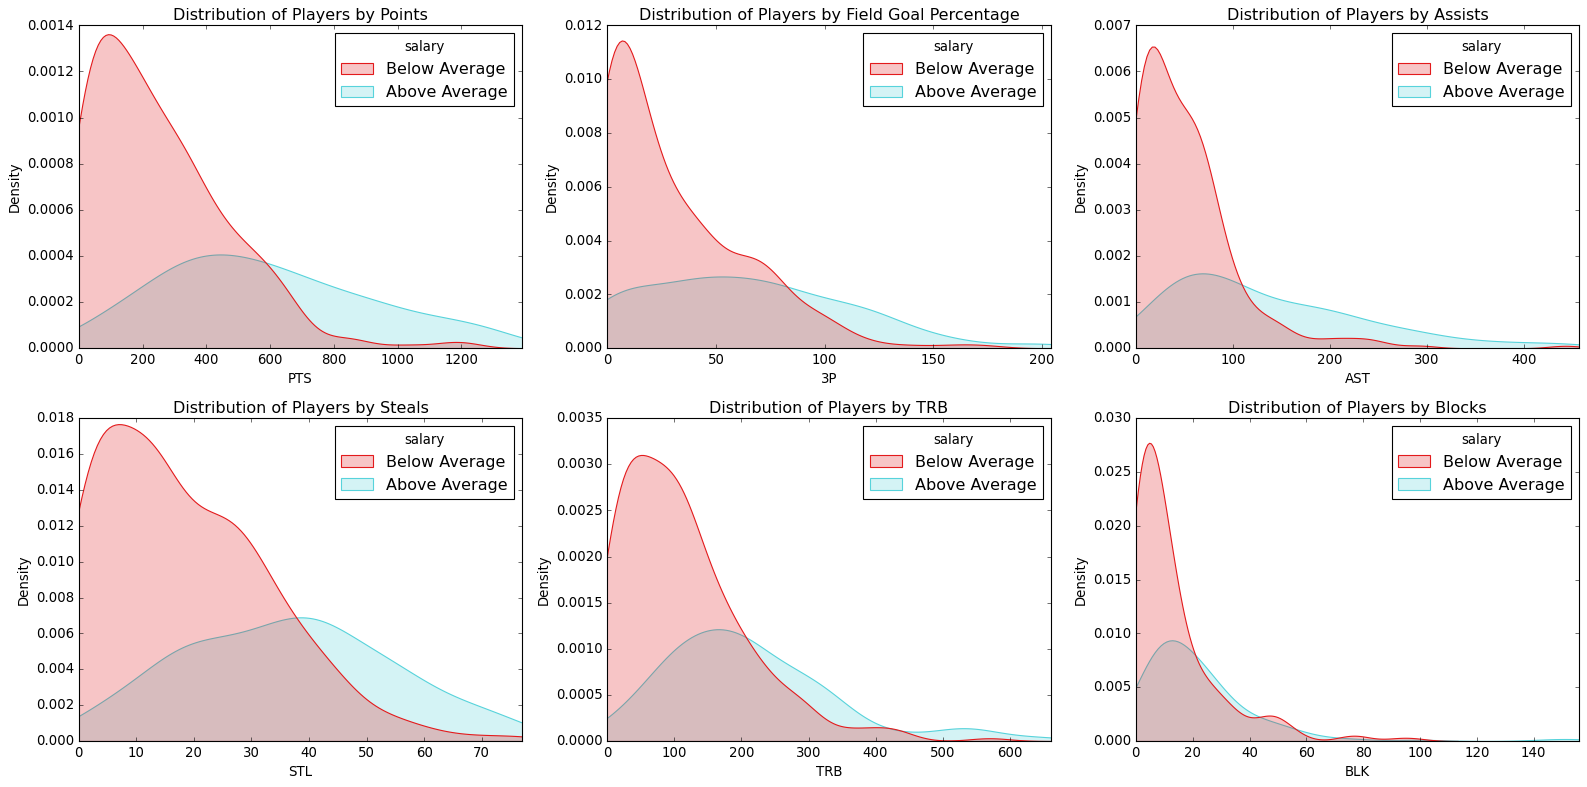

In [178]:
fig, axx = plt.subplots(2,3, figsize = (20,10))
legend_map = {0: 'Below Average', 1: 'Above Average'}

axx[0,0].set_title('Distribution of Players by Points')
sns.kdeplot(x = 'PTS', hue = ss['salary'].map(legend_map) , data = ss, ax = axx[0,0], shade = True,  palette = hlsg_r)
max_pts = ss['PTS'].max()
axx[0,0].set(xlim = (0,max_pts))

axx[0,1].set_title('Distribution of Players by Field Goal Percentage')
sns.kdeplot(x = '3P', hue = ss['salary'].map(legend_map), data = ss, ax = axx[0,1], shade = True, palette = hlsg_r)
max_3P = ss['3P'].max()
axx[0,1].set(xlim = (0,max_3P))

axx[0,2].set_title('Distribution of Players by Assists')
sns.kdeplot(x = 'AST', hue = ss['salary'].map(legend_map), data = ss, ax = axx[0,2], shade = True, palette = hlsg_r)
max_AST = ss['AST'].max()
axx[0,2].set(xlim = (0,max_AST))

axx[1,0].set_title('Distribution of Players by Steals')
sns.kdeplot(x = 'STL', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,0], shade = True, palette = hlsg_r)
max_STL = ss['STL'].max()
axx[1,0].set(xlim = (0,max_STL))

axx[1,1].set_title('Distribution of Players by TRB')
sns.kdeplot(x = 'TRB', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,1], shade = True, palette = hlsg_r)
max_TRB = ss['TRB'].max()
axx[1,1].set(xlim = (0,max_TRB))

axx[1,2].set_title('Distribution of Players by Blocks')
sns.kdeplot(x = 'BLK', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,2], shade = True, palette = hlsg_r)
max_BLK = ss['BLK'].max()
axx[1,2].set(xlim = (0,max_BLK))

fig.set_facecolor('white')
plt.tight_layout()

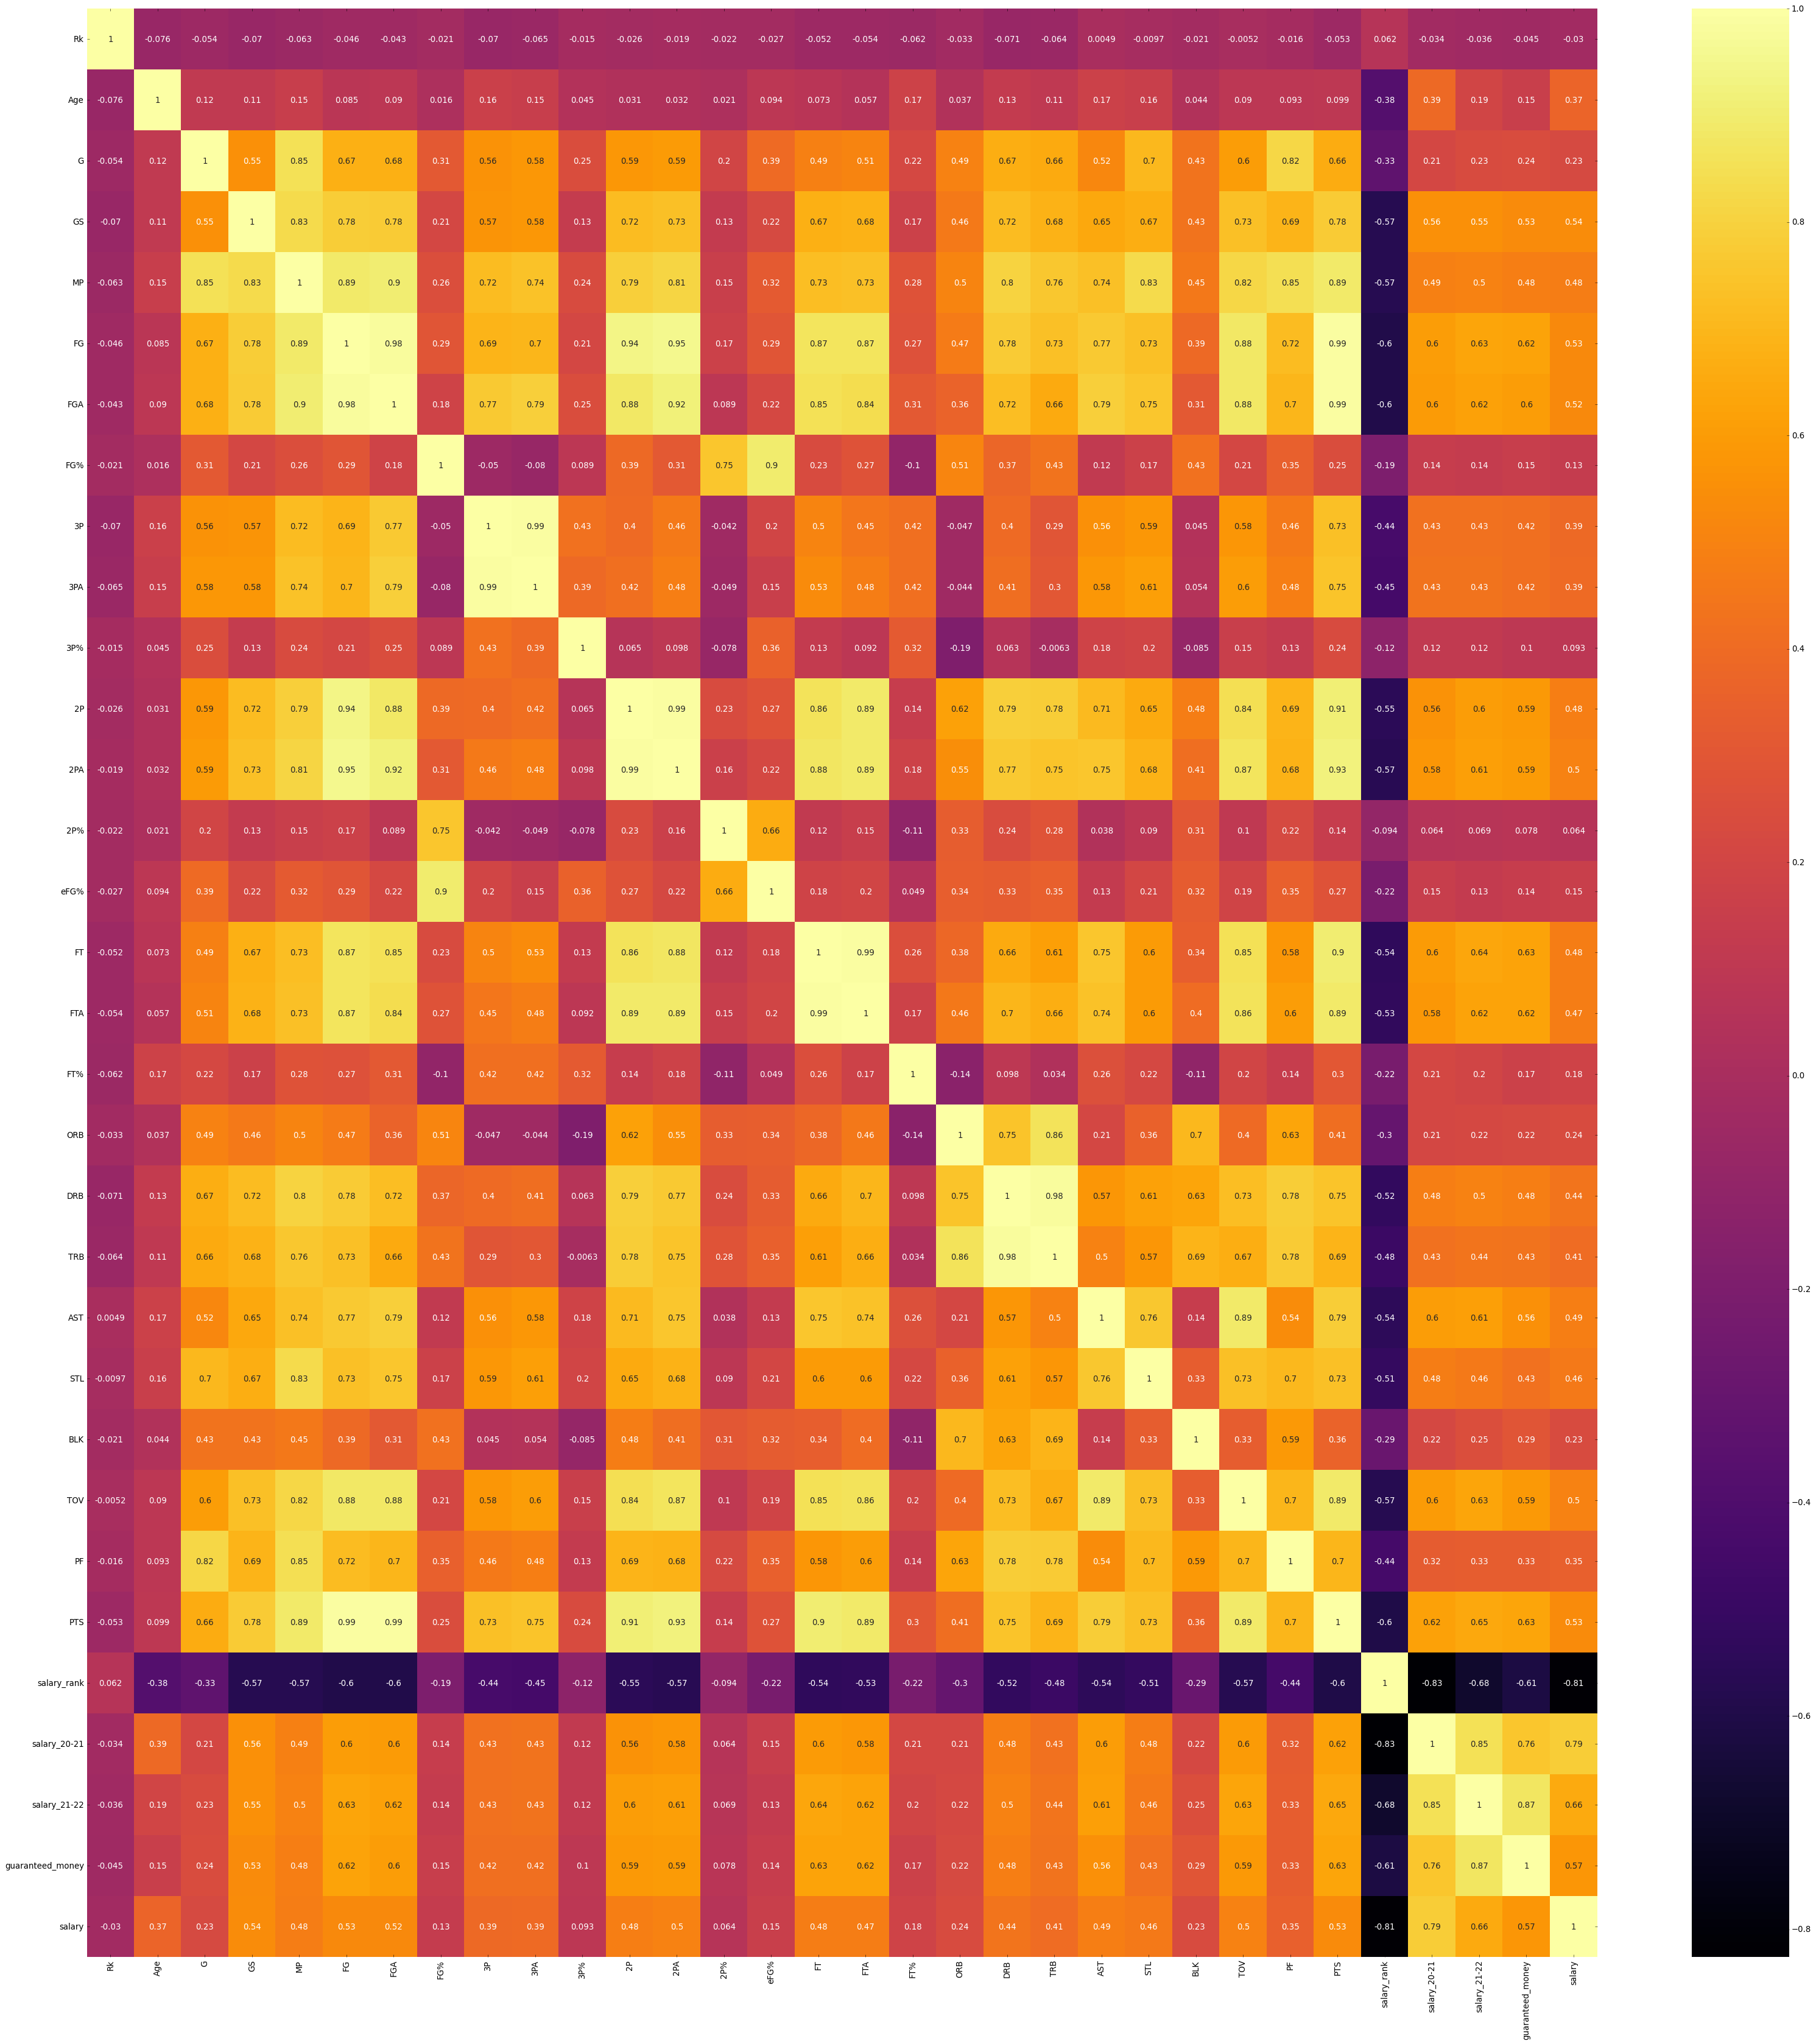